In [1]:
import assm
import pyreadr
import numpy as np
import pandas as pd

import seaborn as sns

from assm.model.models_GARD import GARDModel_2A
from assm.utility.load_data import load_example_dataset

In [2]:
sns.set(context="talk",
        style="white",
        palette="husl",
        rc={'figure.figsize': (15, 8)})

## Data preprocessing

In [3]:
data = load_example_dataset()
data = data[data['sbj']<10]
data

,sbj,Trial,rt,item_value_1,item_value_2,choice,DwellLeft,DwellRight,OV,rt_max,Right,gaze_1,gaze_2,diff,Overall Value,Right Value - Left Value,gaze diff,Dwell Time Advantage (R - L),Magnitude
0,1,2.0,1.913,3.0,2.0,1.0,698.0,798.0,5.0,3.794033,0,0.466578,0.533422,1.0,5.0,-1.0,4.0,0.00,Low
1,1,3.0,1.121,5.0,10.0,2.0,540.0,262.0,15.0,3.794033,1,0.673317,0.326683,5.0,15.0,5.0,2.0,-0.50,High
2,1,4.0,2.051,6.0,6.0,2.0,743.0,857.0,12.0,3.794033,1,0.464375,0.535625,0.0,12.0,0.0,4.0,0.00,High
3,1,5.0,1.655,6.0,7.0,2.0,519.0,700.0,13.0,3.794033,1,0.425759,0.574241,1.0,13.0,1.0,5.0,0.25,High
4,1,9.0,2.504,6.0,2.0,1.0,1137.0,1032.0,8.0,3.794033,0,0.524205,0.475795,4.0,8.0,-4.0,4.0,0.00,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814,9,96.0,0.935,0.0,5.0,2.0,479.0,99.0,5.0,2.588291,1,0.828720,0.171280,5.0,5.0,5.0,1.0,-0.75,Low
815,9,97.0,0.870,4.0,5.0,2.0,457.0,119.0,9.0,2.588291,1,0.793403,0.206597,1.0,9.0,1.0,1.0,-0.75,High
816,9,98.0,0.844,6.0,9.0,1.0,358.0,203.0,15.0,2.588291,0,0.638146,0.361854,3.0,15.0,3.0,3.0,-0.25,High
817,9,99.0,1.090,1.0,2.0,2.0,319.0,537.0,3.0,2.588291,1,0.372664,0.627336,1.0,3.0,1.0,5.0,0.25,Low


## Model compiling:

In [4]:
model = GARDModel_2A(hierarchical_levels=2, additive=True, multiplicative=True)

Using cached StanModel


In [5]:
model.model_label

'hierGARD_2A_hybrid'

## Model fitting:

In [6]:
n_warmup = 750
n_sampling = 750
n_chains = 2

In [7]:
model_fit = model.fit(data,
                      iter_warmup=n_warmup,
                      iter_sampling=n_sampling,
                      chains=n_chains,
                      include_last_values=False,
                      print_diagnostics=False)

15:55:33 - cmdstanpy - INFO - CmdStan start processing


Fitting the model using the priors:
sigma_priors {'mu_mu': 1, 'sd_mu': 3, 'mu_sd': 0, 'sd_sd': 3}
v_priors {'mu_mu': 9, 'sd_mu': 3, 'mu_sd': 2, 'sd_sd': 2}
wd_priors {'mu_mu': 1, 'sd_mu': 2, 'mu_sd': 1, 'sd_sd': 1}
ws_priors {'mu_mu': -1, 'sd_mu': 2, 'mu_sd': 3, 'sd_sd': 1}
lambda_priors {'mu_mu': 0, 'sd_mu': 2, 'mu_sd': 1, 'sd_sd': 1}
gam_priors {'mu_mu': 0, 'sd_mu': 1, 'mu_sd': 1, 'sd_sd': 1}
ndt_priors {'mu_mu': 0, 'sd_mu': 2, 'mu_sd': 1, 'sd_sd': 1}


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

15:57:39 - cmdstanpy - INFO - CmdStan done processing.
15:57:39 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: Exception: Exception: Phi: x is nan, but must be not nan! (in '/Users/khamir/_Projects/_PHD/_01_How_to_acount_attention/_codes/assm/assm/stan_models/GARD_2A/hierGARD_2A_hybrid.stan', line 16, column 4 to column 94) (in '/Users/khamir/_Projects/_PHD/_01_How_to_acount_attention/_codes/assm/assm/stan_models/GARD_2A/hierGARD_2A_hybrid.stan', line 37, column 10 to column 57) (in '/Users/khamir/_Projects/_PHD/_01_How_to_acount_attention/_codes/assm/assm/stan_models/GARD_2A/hierGARD_2A_hybrid.stan', line 193, column 2 to column 57)
Consider re-running with show_console=True if the above output is unclear!


15:57:39 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 1 divergent transitions (0.1%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


(1500, 819)
(819,)


# Model checking:

In [8]:
model_fit.rhat.sort_values(by='rhat')

,rhat,variable
lambda_sbj[6],0.998672,lambda_sbj[6]
drift_right_t[460],0.998676,drift_right_t[460]
drift_right_t[440],0.998677,drift_right_t[440]
drift_left_t[448],0.998678,drift_left_t[448]
drift_left_t[50],0.998679,drift_left_t[50]
...,...,...
drift_left_t[710],1.011300,drift_left_t[710]
drift_left_t[656],1.011310,drift_left_t[656]
v_sbj[8],1.014470,v_sbj[8]
z_v[8],1.015100,z_v[8]


In [9]:
model_fit.waic

{'lppd': -1063.0789956885606,
 'p_waic': 35.82148426141228,
 'waic': 2197.8009598999456,
 'waic_se': 66.11578580590047}

## Posteriors

In [10]:
model_fit.samples.describe()

,transf_mu_v,transf_mu_wd,transf_mu_ws,transf_mu_sigma,transf_mu_lambda,transf_mu_gam,transf_mu_ndt,v_sbj[1],v_sbj[2],v_sbj[3],...,gam_sbj[9],ndt_sbj[1],ndt_sbj[2],ndt_sbj[3],ndt_sbj[4],ndt_sbj[5],ndt_sbj[6],ndt_sbj[7],ndt_sbj[8],ndt_sbj[9]
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1.500000e+03,1500.000000,...,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.332913,0.068069,0.007205,0.352776,0.131746,0.642440,0.243203,0.364022,2.731077e-01,0.094762,...,0.708942,0.164170,0.180596,0.235059,0.467666,0.157777,0.314022,0.148682,0.496617,0.221495
std,0.141418,0.015195,0.007879,0.027208,0.097594,0.158246,0.093434,0.091925,1.385839e-01,0.032298,...,0.191892,0.082827,0.084211,0.128388,0.109384,0.078024,0.071832,0.088720,0.105447,0.082116
min,0.025135,0.020644,0.000132,0.276560,0.001297,0.113036,0.012903,0.000184,6.808880e-08,0.001734,...,0.000017,0.000551,0.000068,0.000261,0.045532,0.000445,0.047905,0.000347,0.029769,0.009263
25%,0.246105,0.058572,0.003068,0.333390,0.058102,0.541042,0.174832,0.315178,1.567870e-01,0.074914,...,0.576441,0.104195,0.117100,0.138171,0.409470,0.098702,0.271719,0.080015,0.442898,0.168956
50%,0.310062,0.066414,0.005373,0.350511,0.110530,0.645580,0.240432,0.377003,2.796730e-01,0.099951,...,0.715666,0.160494,0.181671,0.228159,0.483094,0.155002,0.319960,0.139185,0.510158,0.222803
75%,0.395705,0.075618,0.008587,0.370377,0.178904,0.756833,0.305918,0.428350,3.886060e-01,0.117896,...,0.868915,0.219289,0.242064,0.325786,0.543122,0.210283,0.363780,0.206340,0.565048,0.277105
max,1.540360,0.200992,0.088007,0.460732,0.636513,0.989734,0.720373,0.573024,6.301280e-01,0.168457,...,1.000000,0.446954,0.396486,0.657890,0.728921,0.430296,0.503481,0.476292,0.813588,0.487380


0.3329128228666667 [0.0918251, 0.633497]
0.0680687188 [0.0416663, 0.0948866]
0.0072045795300000005 [0.000131734, 0.019897]
0.352776184 [0.30026, 0.404827]
0.13174557973333334 [0.00380393, 0.311971]
0.6424397366666666 [0.328118, 0.94245]
0.24320304593333336 [0.0728039, 0.423767]


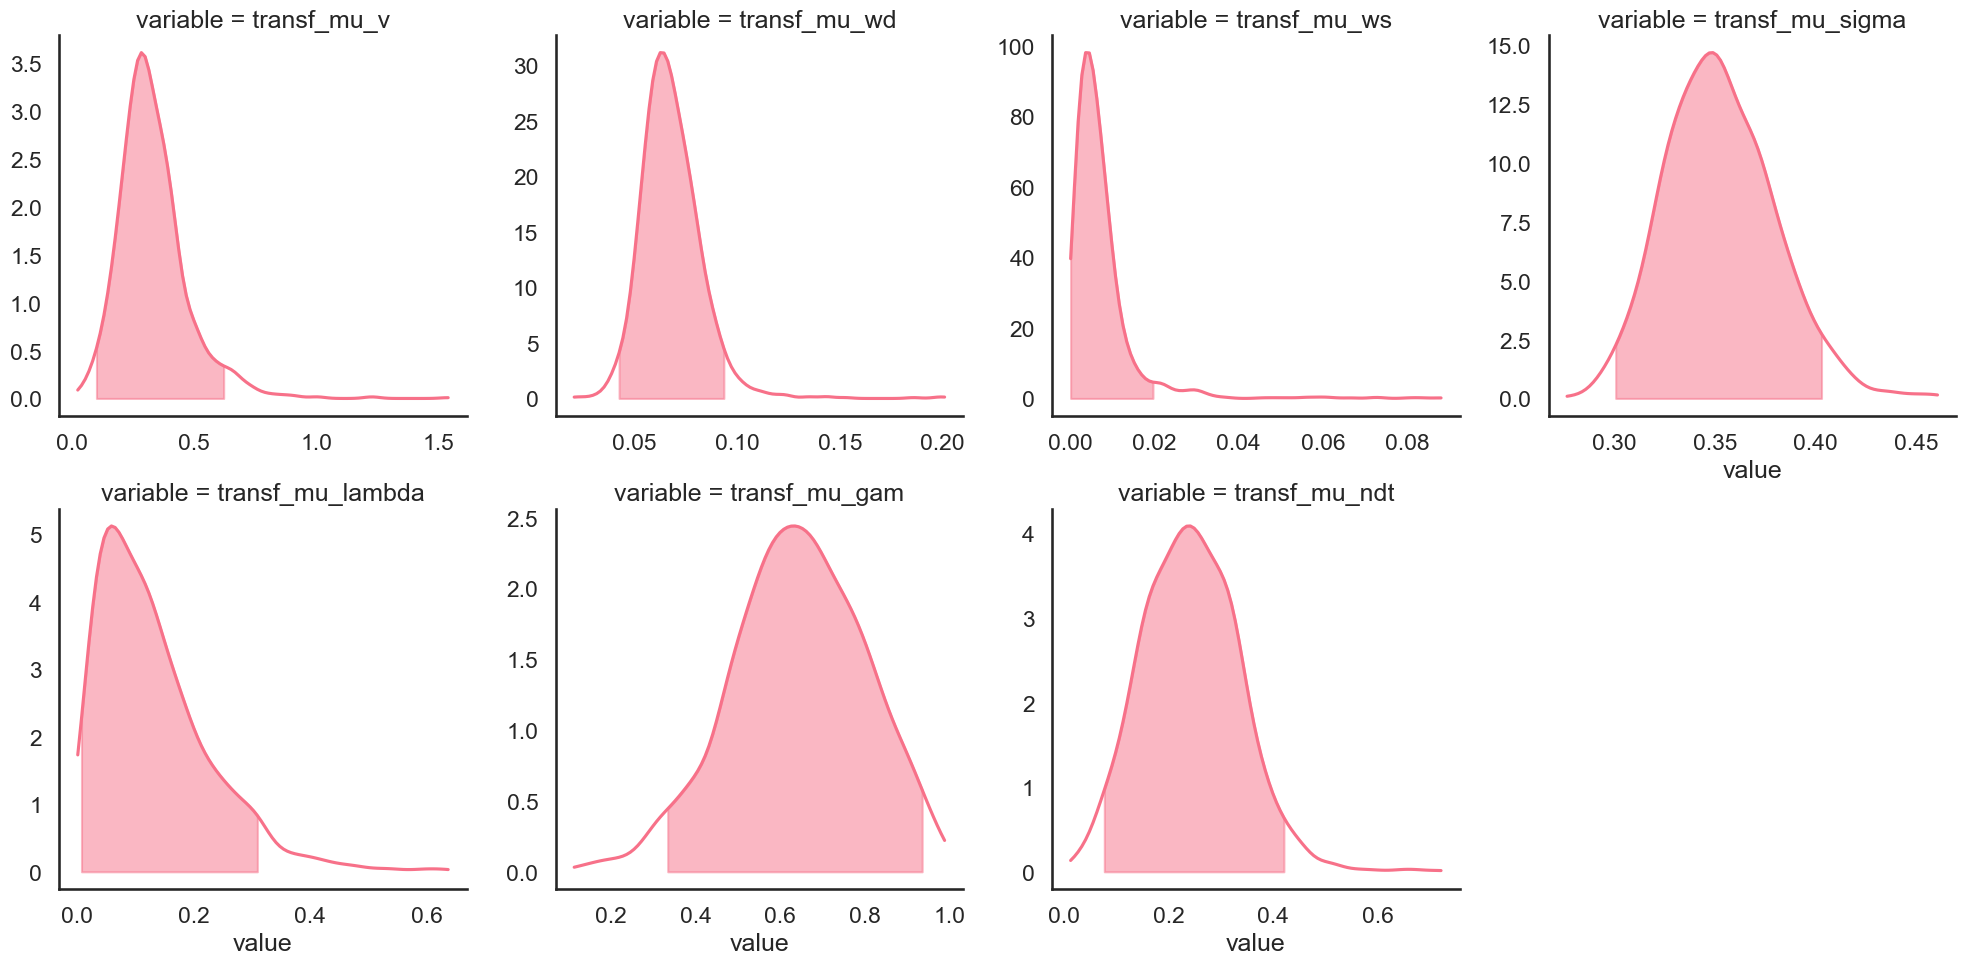

In [11]:
g = model_fit.plot_posteriors(height=5, show_intervals='HDI')